<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Instructions</a></span></li><li><span><a href="#Setting-up-&amp;-extracting-the-data-files" data-toc-modified-id="Setting-up-&amp;-extracting-the-data-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up &amp; extracting the data files</a></span></li><li><span><a href="#Exploring-the-dataset" data-toc-modified-id="Exploring-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the dataset</a></span></li><li><span><a href="#Splitting-the-dataset-into-training-and-testing-groups" data-toc-modified-id="Splitting-the-dataset-into-training-and-testing-groups-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Splitting the dataset into training and testing groups</a></span></li><li><span><a href="#Data-augmentation-using-ImageDataGenerator" data-toc-modified-id="Data-augmentation-using-ImageDataGenerator-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data augmentation using ImageDataGenerator</a></span><ul class="toc-item"><li><span><a href="#Generating-Training-Data" data-toc-modified-id="Generating-Training-Data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generating Training Data</a></span></li></ul></li><li><span><a href="#Generating-Testing-Data" data-toc-modified-id="Generating-Testing-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating Testing Data</a></span></li><li><span><a href="#Compiling-the-model" data-toc-modified-id="Compiling-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compiling the model</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Visualising-the-training-results" data-toc-modified-id="Visualising-the-training-results-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualising the training results</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Saving the model</a></span></li><li><span><a href="#Testing-the-model-on-&quot;real&quot;-data" data-toc-modified-id="Testing-the-model-on-&quot;real&quot;-data-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Testing the model on "real" data</a></span><ul class="toc-item"><li><span><a href="#Data-generation" data-toc-modified-id="Data-generation-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Data generation</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#Using-the-Softmax()-function-to-visualise-probabilities-&amp;-observe-results" data-toc-modified-id="Using-the-Softmax()-function-to-visualise-probabilities-&amp;-observe-results-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Using the Softmax() function to visualise probabilities &amp; observe results</a></span></li><li><span><a href="#Bonus:-Testing-the-model-on-my-lovingly-crafted-collection-of-my-cats'-photos-(and-a-single-picture-of-my-friend's-dog-for-good-measure)." data-toc-modified-id="Bonus:-Testing-the-model-on-my-lovingly-crafted-collection-of-my-cats'-photos-(and-a-single-picture-of-my-friend's-dog-for-good-measure).-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Bonus: Testing the model on my lovingly crafted collection of my cats' photos (and a single picture of my friend's dog for good measure).</a></span></li></ul></div>

# Data Challenge  1: Cat or dog?

## Instructions

Build a TensorFlow model to solve the timeless question of “Cat or Dog?” You can find the dataset here:

https://www.kaggle.com/competitions/dogs-vs-cats/data

## Setting up & extracting the data files

✏️ Importing just tensorflow for now, I'll know what packages are required at each stage once I've established the pipeline...  

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

✏️ Getting a list of the file names contained within the test folder using the OS package

In [2]:
import os
filenames = os.listdir('/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/train')

✏️ Establishing the categories, where **cat = 0 and dog = 1**

In [3]:
categories = []

for filename in filenames:
    
    category = filename.split('.')[0]
    
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

# Sanity check
print(categories[0:10])

['1', '0', '1', '0', '0', '0', '1', '0', '0', '1']


✏️ Creating a labels dataframe containing the file names & categories

In [4]:
import pandas as pd
df = pd.DataFrame({
    'filename': filenames,
    'category': categories})

df.head()

,filename,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0


✏️ Checking how many images there are within each category

In [5]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

## Exploring the dataset

✏️ Exploring the images contained within the folder at random: 

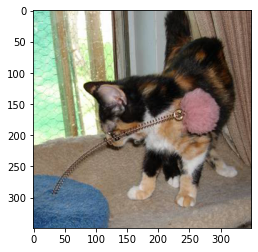

In [6]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import random

folder_path = "/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/train/"
sample_image = random.choice(filenames)

image = load_img(folder_path + sample_image)
plt.imshow(image);

✏️ I found the 'cat.6211.jpg' below while displaying random images and it  LOOKS JUST LIKE MINE when they were kittens. I will definitely be testing this algorithm  on my own cats further down the notebook :-) 

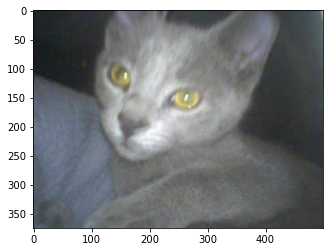

In [7]:
image = load_img(folder_path + 'cat.6211.jpg')
plt.imshow(image);

## Splitting the dataset into training and testing groups

✏️ This part felt unusual because this stage doesn't require the classic "X_train, y_train, X_test, y_test" split. You're able to specify the category column directly during modelling, so as long as the dataframe is split 80/20 we're good to go.

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                               test_size=0.2,
                               random_state = 1)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print(train.shape, test.shape)

(20000, 2) (5000, 2)


## Data augmentation using ImageDataGenerator

✏️ ImageDataGenerator helps to generate batches of tensor image data with real-time data augmentation. This prevents overfitting by increasing the number of samples in the dataset + adding variation. 

In the flower dataset, augmentation is performed using rotation & dropout, but Keras ImageDataGenerator combines a range of such techniques while also scaling the images.  

See this [medium article](https://medium.com/geekculture/custom-data-augmentation-using-keras-imagedatagenerator-7cfd58e54171) for further detail. 

### Generating Training Data

✏️ For the training data, we will be:

1. Rescaling the images so that their pixel range from 0 to 1
2. Randomly rotating the images by 15 degrees
3. Altering the shear angle in counter-clockwise direction by 0.1
4. Randomly zooming into the images by 0.2
5. Randomly flipping the images horizontally
6. Randomly shifting the width by 0.1
7. Randomly shifting the height by 0.1

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rotation_range=15,
                                          rescale=1./255,
                                          shear_range=0.1,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1)

In [10]:
train_augmented_data = train_data_generator.flow_from_dataframe(train, 
                                                                folder_path, 
                                                                x_col='filename',
                                                                y_col='category',
                                                                target_size=(128,128),
                                                                class_mode='categorical',
                                                                batch_size=15)

Found 20000 validated image filenames belonging to 2 classes.


## Generating Testing Data

✏️  We just want to scale the training data so that the pixel values range from 0 to 1 without performing any other transformations. 

In [11]:
test_data_generator = ImageDataGenerator(rescale=1./255)

test_augmented_data = test_data_generator.flow_from_dataframe(test, 
                                                              folder_path, 
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=(128,128),
                                                              class_mode='categorical',
                                                              batch_size=15)

Found 5000 validated image filenames belonging to 2 classes.


## Compiling the model

✏️ I used the tuned parameters applied to this dataset by [Kartik Khandelwal](https://www.kaggle.com/code/kartik2khandelwal/beginner-s-implementation-of-deep-learning) on Kaggle. I may explore hyperparameter tuning later down the line, but I just want to feel comfortable with all other steps & order of things first. 

In [12]:
img_height = 128
img_width = 128

In [13]:
import keras

model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, 
                                             kernel_size=3, 
                                             strides=(1,1), 
                                             padding='valid',
                                             activation= 'relu', 
                                             input_shape=(128,128,3)),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, 
                                             kernel_size=3, 
                                             strides=(2,2), 
                                             padding='same', 
                                             activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, 
                                             kernel_size=3, 
                                             strides=(2,2), 
                                             padding='same', 
                                             activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, 
                                            activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, 
                                            activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, 
                                            activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, 
                                            activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=2, 
                                            activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

2022-12-16 19:19:58.367818: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(optimizer='adam', 
              loss= 'categorical_crossentropy', 
              metrics=['accuracy'])

## Training the model

In [15]:
history = model.fit(train_augmented_data, 
                    epochs=30, 
                    verbose=1,
                    validation_data=test_augmented_data)

Epoch 1/30


2022-12-16 19:19:58.575758: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1334/1334 [==============================] - 204s 153ms/step - loss: 0.6935 - accuracy: 0.4985 - val_loss: 0.6941 - val_accuracy: 0.4974
Epoch 2/30
1334/1334 [==============================] - 218s 163ms/step - loss: 0.6867 - accuracy: 0.5487 - val_loss: 0.6750 - val_accuracy: 0.5946
Epoch 3/30
1334/1334 [==============================] - 202s 151ms/step - loss: 0.6541 - accuracy: 0.6199 - val_loss: 0.6112 - val_accuracy: 0.6730
Epoch 4/30
1334/1334 [==============================] - 196s 147ms/step - loss: 0.6124 - accuracy: 0.6685 - val_loss: 0.5640 - val_accuracy: 0.7128
Epoch 5/30
1334/1334 [==============================] - 204s 153ms/step - loss: 0.5683 - accuracy: 0.7113 - val_loss: 0.5296 - val_accuracy: 0.7264
Epoch 6/30
1334/1334 [==============================] - 202s 151ms/step - loss: 0.5350 - accuracy: 0.7394 - val_loss: 0.5190 - val_accuracy: 0.7312
Epoch 7/30
1334/1334 [==============================] - 206s 154ms/step - loss: 0.5166 - accuracy: 0.7506 - val_loss: 0.510

## Visualising the training results

✏️ Checking for overfitting & closeness of the training and validation accuracies using the plot suggested in the Keras flower dataset example.

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

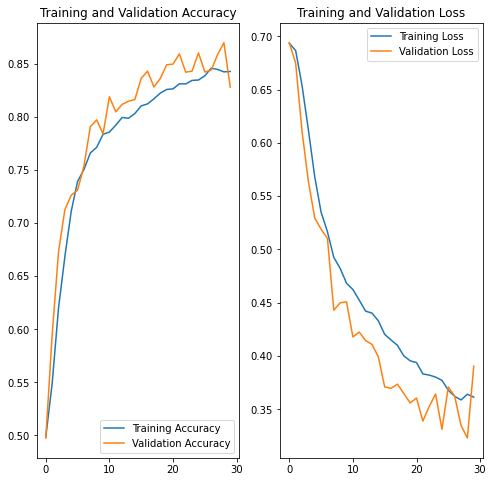

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

✏️ Looking good...

## Confusion matrix

In [57]:
from sklearn import metrics

def convert_to_integer(x):
    return int(x)

In [65]:
train_augmented_data

In [67]:
### Training set

train_predictions = model.predict(train_augmented_data)

train['prediction'] = np.argmax(train_predictions, axis=-1)
train["category"] = train["category"].map(convert_to_integer)

train.head(5)

,filename,category,prediction
0,cat.10536.jpg,0,1
1,cat.771.jpg,0,0
2,cat.6549.jpg,0,0
3,cat.9270.jpg,0,0
4,cat.3431.jpg,0,0


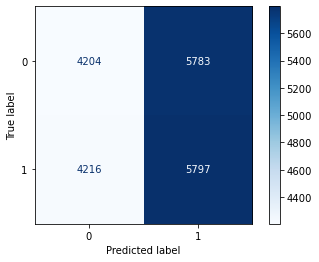

              precision    recall  f1-score   support

           0       0.50      0.42      0.46      9987
           1       0.50      0.58      0.54     10013

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [64]:
train_set_confusion_matrix = metrics.confusion_matrix(train["category"], train["prediction"])
metrics.ConfusionMatrixDisplay(train_set_confusion_matrix).plot(cmap='Blues')
plt.show()

print(metrics.classification_report(train["category"], train["prediction"]))

✏️ A little confused on whether I'm doing something wrong because it appears that the model is performing by chance at 50% accuracy? Which is a drastically different number from what Keras's built-in accuracy is reporting... Not surer how to interpret this. But if this is correct - the model is performing mostly but chance, except for when it identifies dogs, which is a little more successful.

In [56]:
### Testing set

test_predictions = model.predict(test_augmented_data)

test['prediction'] = np.argmax(test_predictions, axis=-1)
test["category"] = test["category"].map(convert_to_integer)

test.head(5)

,filename,category,prediction
0,cat.7521.jpg,0,0
1,dog.2559.jpg,1,1
2,cat.9378.jpg,0,1
3,dog.2542.jpg,1,1
4,dog.10678.jpg,1,1


              precision    recall  f1-score   support

           0       0.50      0.40      0.44      2513
           1       0.49      0.59      0.54      2487

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000



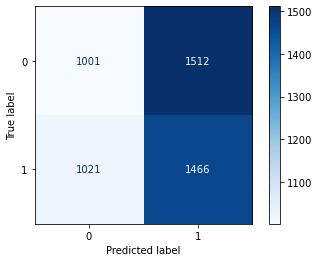

In [62]:
test_set_confusion_matrix = metrics.confusion_matrix(test["category"], test["prediction"])
metrics.ConfusionMatrixDisplay(test_set_confusion_matrix).plot(cmap='Blues')
plt.show()

print(metrics.classification_report(test["category"], test["prediction"]))

✏️ Overall, this model seems much better at identifying dogs, than cats within the test set of data.

## Saving the model

✏️ Since deep learning models can take hours, days, and even weeks to train, saving and loading the models to a disk can save you a lot of time when you want to run it again. I'll be doing just that...

In [20]:
model.save('cat_vs_dog_keras_model.h5')

## Testing the model on "real" data

✏️ Our previous "testing" dataset was only used to quantitatively assess the performance of the model against an subset with known labels. I will now be applying the model to new unseen dataset with no labels to visualise its predictive capabilities.

### Data generation

In [21]:
test_files = os.listdir("/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/test1")
test_df = pd.DataFrame({'filename': test_files})

image_id=[]

for file in test_df["filename"]:
    image_id.append(file.split(".")[0])

test_sample_count = test_df.shape[0]

✏️ As above, I'm scaling the pixel values to range from 0 to 1 without altering any other aspects of the data.

In [22]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(test_df,
                                                   "/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/test1", 
                                                   x_col='filename',
                                                   y_col=None,
                                                   class_mode=None,
                                                   target_size=(128,128),
                                                   batch_size=15,
                                                   shuffle=False)

Found 12500 validated image filenames.


### Predictions

✏️ Here, I am making and saving the model's predictions into a dataframe. Those who participated in the Kaggle challenge would submit this for evaluation to get the real labels. I won't have the access to those, so I will simply be using this dataset to plot a subset of the images and visually observe the results. 

In [23]:
predictions = model.predict(test_generator, 
                            steps=np.ceil(test_sample_count/15))

In [24]:
import numpy as np
test_df['category'] = np.argmax(predictions, axis=-1)

In [25]:
test_df.head()

,filename,category
0,9733.jpg,0
1,63.jpg,1
2,6400.jpg,1
3,823.jpg,1
4,4217.jpg,1


## Using the Softmax() function to visualise probabilities & observe results

✏️ Now we can find out how well the model actually did. Using the Softmax function will allow me to get the model's confidence about each of the images and plot it alongside the images and real labels.

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_generator)

In [27]:
confidence_scores = []

for i in predictions:
    confidence_scores.append(max(i))
    
test_df["confidence"] = confidence_scores

def insert_class_names(x):
    if x == 0:
        return "Cat"
    else:
        return "Dog"

test_df["class_name"] = test_df["category"].map(insert_class_names)

test_df.head()

,filename,category,confidence,class_name
0,9733.jpg,0,0.722034,Cat
1,63.jpg,1,0.678069,Dog
2,6400.jpg,1,0.730694,Dog
3,823.jpg,1,0.731058,Dog
4,4217.jpg,1,0.504174,Dog


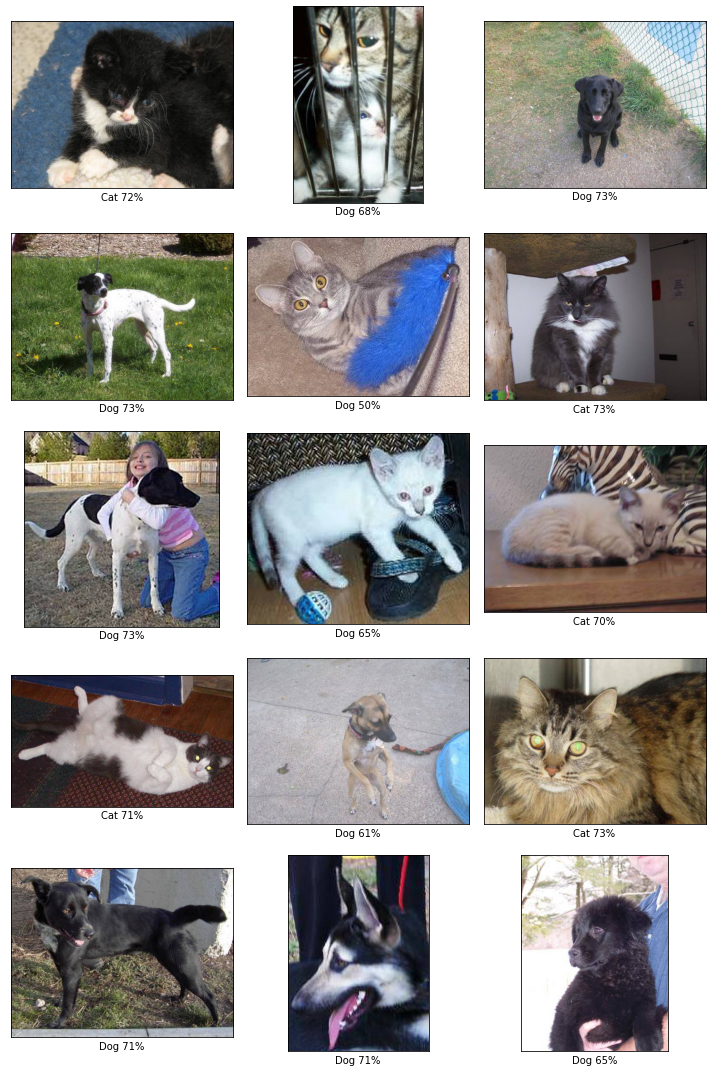

In [29]:
folder_path = "/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/test1/"

plt.figure(figsize=(10,15))

n_rows = 5
n_cols = 3
n_images = n_rows*n_cols

for i in range(n_images):
    
    plt.subplot(n_rows, n_cols, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    image = load_img(folder_path + test_df["filename"][i])
    plt.imshow(image)
    
    plt.xlabel("{} {:2.0f}%".format(test_df["class_name"][i],
                                  100*test_df["confidence"][i]))

plt.tight_layout()
plt.show()

✏️ Okay... by visual inspection, of the 15 images I am looking at 12 are correctly identified. 80% accuracy on this subset of unseen data!

## Bonus: Testing the model on my lovingly crafted collection of my cats' photos (and a single picture of my friend's dog for good measure).

In [32]:
test_files = os.listdir("/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/My Cats")

test_df = pd.DataFrame({'filename': test_files})

test_df = test_df.drop(0, axis=0)
test_sample_count = test_df.shape[0]
test_df.head()

,filename
1,8.jpg
2,9.jpg
3,14.jpg
4,15.jpg
5,17.jpg


💡 I learned two things while trying to make this work:
1. Images need to be resized and converted to JPGs before uploading
2. There is a hidden file that exists inside folders on Macs which needs to be deleted from the dataframe

In [33]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(test_df,
                                              "/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/My Cats", 
                                              x_col='filename',
                                              y_col=None,
                                              class_mode=None,
                                              target_size=(128,128),
                                              batch_size=15,
                                              shuffle=False)

Found 24 validated image filenames.


In [34]:
# Getting predicted labels
predictions = model.predict(test_generator, steps=np.ceil(test_sample_count/15))
test_df['category'] = np.argmax(predictions, axis=-1)

###

# Getting the confidence scores
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_generator)

confidence_scores = []
for i in predictions:
    confidence_scores.append(max(i))
test_df["confidence"] = confidence_scores

###

# Inserting the class names for annotation purposes
def insert_class_names(x):
    if x == 0:
        return "Cat"
    else:
        return "Dog"
test_df["class_name"] = test_df["category"].map(insert_class_names)
test_df.head()

,filename,category,confidence,class_name
1,8.jpg,0,0.632086,Cat
2,9.jpg,1,0.700975,Dog
3,14.jpg,1,0.522427,Dog
4,15.jpg,0,0.730985,Cat
5,17.jpg,0,0.714492,Cat


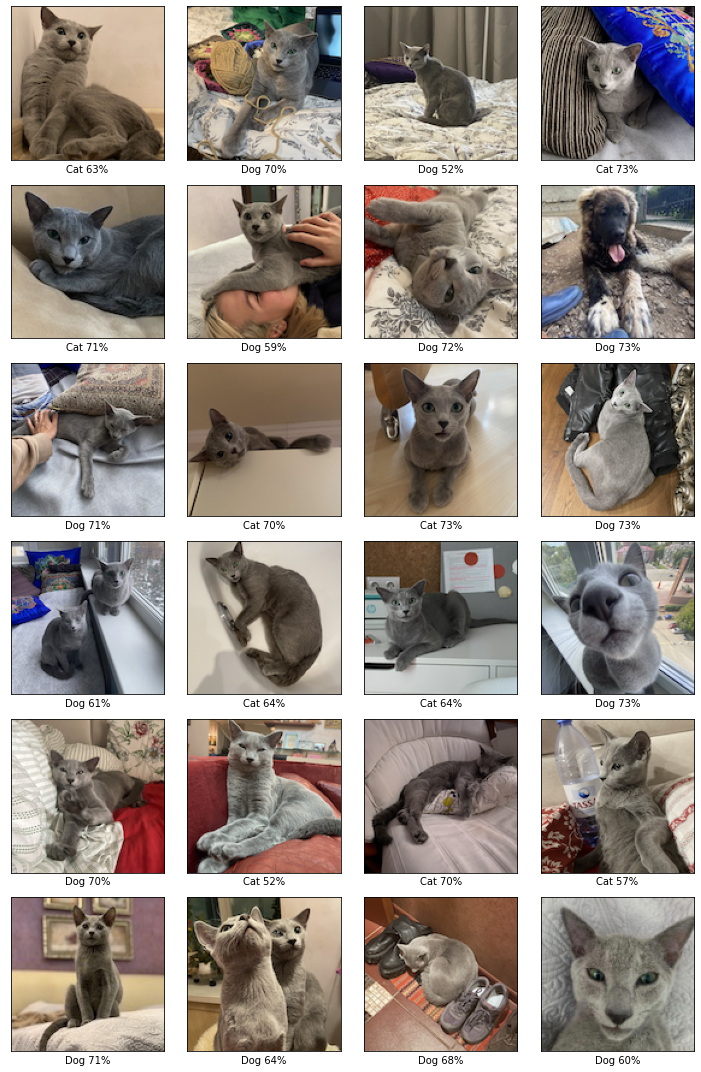

In [35]:
### Plotting the labelled images...

folder_path = "/Users/anastasiakuzmich/Desktop/R2_Squad_Challenge/dogs-vs-cats/My Cats/"

plt.figure(figsize=(10,15))

n_rows = 6
n_cols = 4
n_images = n_rows*n_cols

for i in range(n_images):
    
    plt.subplot(n_rows, n_cols, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    image = load_img(folder_path + test_df["filename"][i+1])
    plt.imshow(image)
    
    plt.xlabel("{} {:2.0f}%".format(test_df["class_name"][i+1],
                                  100*test_df["confidence"][i+1]))

plt.tight_layout()
plt.show()

✏️ This model thinks my cats are dogs on 50% of occasions... Not sure what the take away here is. 

# Conclusion 

✏️ 

This notebook was an exploration of the Keras Tensorflow Image Classification algorithm. I sadly can't report that my results were particularly impressive, but I have definitely learned new methods and feel a lot more comfortable using the package. 

On paper, this model was 83% successful on the training dataset in a binary classification task of identifying cat vs dog images. The baseline threshold for binary classification is 50%, so it was performing above chance. This was confirmed in the visual inspection of the model's predictions on a subset of unseen & unlabeled data, in which it performed with an accuracy of 80%. 

One limitation of this work became clear when plotting a confusion matrix, in which the model's accuracy score was not reflective of that reported during the fitting of the model. Secondly, I did not have a labeled dataset for the "real" unseen test set, I could not confirm its efficiency. Thirdly, when testing the model on my cats, it also seemed to be performing entirely by chance. 

Lastly, I used a set of hyperparameters that was pre-tuned on this dataset by another Kaggle user. I will attempt to tune it myself & hopefully address the above issues once I get more comfortable with the network structure and components, and can explore the hyperparameters and hopefully improve the outcome.